In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('Real estate.csv', index_col = 0)

In [3]:
df['Year'] = df['X1 transaction date'].astype(str).str.split('.').str[0].astype(int)
df.drop('X1 transaction date', axis =1, inplace=True)

In [4]:
df.sample(10)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
No,,,,,,,
154,6.5,376.17090,6,24.95418,121.53713,40.9,2013
129,41.3,124.99120,6,24.96674,121.54039,60.7,2013
394,16.9,967.40000,4,24.98872,121.53408,40.3,2013
235,8.0,2216.61200,4,24.96007,121.51361,23.9,2013
253,5.9,90.45606,9,24.97433,121.54310,52.7,2012
410,13.7,4082.01500,0,24.94155,121.50381,15.4,2013
42,16.8,4066.58700,0,24.94297,121.50342,18.2,2013
124,0.0,185.42960,0,24.97110,121.53170,45.5,2013
283,2.0,1455.79800,1,24.95120,121.54900,25.6,2012


In [5]:
df.shape

(414, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
 6   Year                                    414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 25.9 KB


In [7]:
df.isna().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
Year                                      0
dtype: int64

In [8]:
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
No,,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9,2012
2,19.5,306.59470,9,24.98034,121.53951,42.2,2012
3,13.3,561.98450,5,24.98746,121.54391,47.3,2013
4,13.3,561.98450,5,24.98746,121.54391,54.8,2013
5,5.0,390.56840,5,24.97937,121.54245,43.1,2012
...,...,...,...,...,...,...,...
410,13.7,4082.01500,0,24.94155,121.50381,15.4,2013
411,5.6,90.45606,9,24.97433,121.54310,50.0,2012
412,18.8,390.96960,7,24.97923,121.53986,40.6,2013


<Axes: xlabel='X5 latitude', ylabel='X6 longitude'>

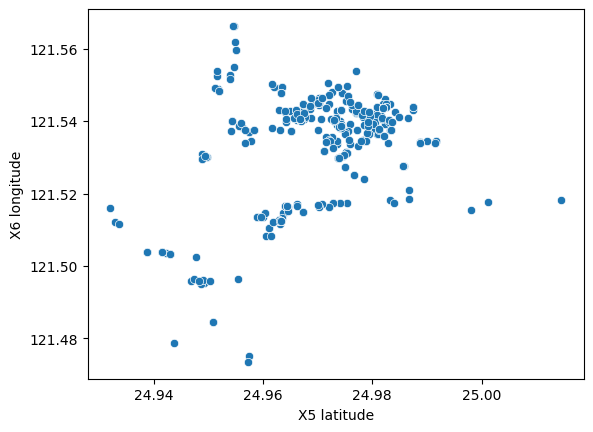

In [9]:
sns.scatterplot(data = df, x = 'X5 latitude', y= 'X6 longitude')

In [10]:
X = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area'].copy()

In [11]:
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Year
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,2012
2,19.5,306.59470,9,24.98034,121.53951,2012
3,13.3,561.98450,5,24.98746,121.54391,2013
4,13.3,561.98450,5,24.98746,121.54391,2013
5,5.0,390.56840,5,24.97937,121.54245,2012


In [12]:
y[:5]

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
std_scaler = StandardScaler()

In [15]:
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [16]:
poly_features = PolynomialFeatures(degree = 10)

In [17]:
X_poly = poly_features.fit_transform(X_train)

In [53]:
l_r = Pipeline([
    ('poly', PolynomialFeatures(degree = 3)),
    ('lr', LinearRegression()) 
])
l_r2 = LinearRegression()

In [54]:
l_r.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])

In [55]:
l_r_pred = l_r.predict(X_test)

In [56]:
l_r2.fit(X_train, y_train)

LinearRegression()

In [57]:
l_r2_pred = l_r2.predict(X_test)

In [58]:
mean_squared_error(y_test, l_r_pred)

55.392460143307595

In [59]:
mean_squared_error(y_test, l_r2_pred)

51.121347580879025

In [67]:
sgd = SGDRegressor(random_state = 42)

In [68]:
sgd.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [69]:
sgd_pred = sgd.predict(X_test)

In [70]:
mean_squared_error(y_test, sgd_pred)

50.78635609196713

In [73]:
r_forest = RandomForestRegressor(random_state = 42)

In [74]:
r_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
r_forest_pred = r_forest.predict(X_test)

In [77]:
mean_squared_error(y_test, r_forest_pred)

31.63324965620378